In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.api as sm

price = pd.read_table('pricelist.csv',delimiter =';')
combi = pd.read_table('Historical_combi2.csv',delimiter =';')
I_2011 = pd.read_table('UralNWE_2014.csv',delimiter =',')

combi=combi.fillna(0)

In [2]:
I_2011

,Pred Year,Pred brent 2014,Pred FO 1% 2014,Pred FO 3.5% 2014,Pred Gasoil 2014,TD 2014,Actual 2014,MD 2014
0,2008,75.0,-13.96,-21.85,17.55,-3.52,-1.7,-4.71
1,2009,71.0,-13.27,-18.76,15.54,-3.12,-1.7,-3.92
2,2010,82.5,-8.44,-14.03,15.81,-2.54,-1.7,-3.55
3,2011,100.0,1.37,-4.22,25.76,-2.88,-1.7,-3.22
4,2012,100.0,-6.84,-11.13,15.36,-2.12,-1.7,-2.50
5,2013,100.0,-7.03,-12.15,15.33,-2.25,-1.7,-2.90


In [8]:
import datetime
datetimes = [datetime.datetime.strptime(d, '%d.%m.%Y') for d in combi["Date"]]


df = pd.DataFrame(datetimes, columns=['date'])
df.loc[:, 'date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

combi = combi.assign(df=df['date'].values)
#print(combi)


/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


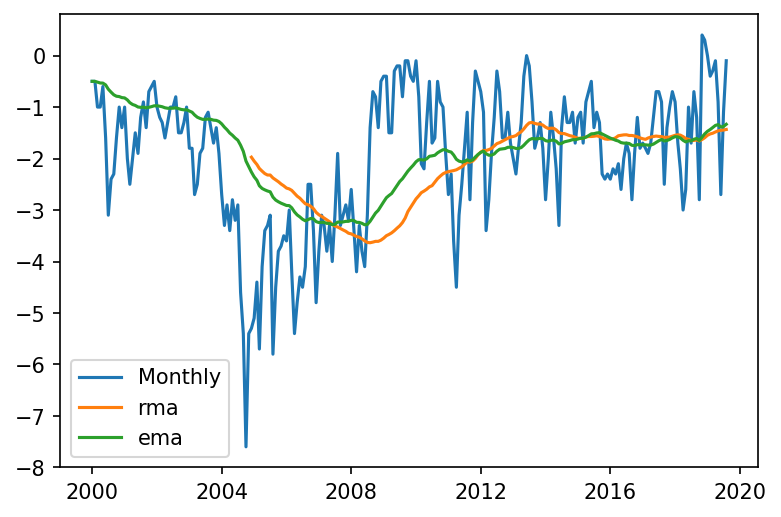

In [9]:
plt.rcParams['figure.dpi'] = 150

rma60 = combi["Urals NWE"].rolling(window=60).mean()
ema60 = combi["Urals NWE"].ewm(span=60, adjust=False).mean()
plt.plot(combi["df"],combi["Urals NWE"])
plt.plot(combi["df"],rma60)
plt.plot(combi["df"],ema60)
plt.legend(("Monthly","rma","ema"))
plt.show()

combi = combi.assign(ema60=ema60.values)
combi = combi.assign(rma60=rma60.values)

In [10]:
take = 2014

In [11]:
if take==2011: 
    ema=[combi[combi['df']=='2005-01-01']['ema60'].values,combi[combi['df']=='2006-01-01']['ema60'].values   \
     ,combi[combi['df']=='2007-01-01']['ema60'].values,combi[combi['df']=='2008-01-01']['ema60'].values  \
     ,combi[combi['df']=='2009-01-01']['ema60'].values,combi[combi['df']=='2010-01-01']['ema60'].values]
    
elif take==2012:
    ema=[combi[combi['df']=='2006-01-01']['ema60'].values,combi[combi['df']=='2007-01-01']['ema60'].values   \
     ,combi[combi['df']=='2008-01-01']['ema60'].values,combi[combi['df']=='2009-01-01']['ema60'].values  \
     ,combi[combi['df']=='2010-01-01']['ema60'].values,combi[combi['df']=='2011-01-01']['ema60'].values]
    
elif take==2013:
    ema=[combi[combi['df']=='2007-01-01']['ema60'].values,combi[combi['df']=='2008-01-01']['ema60'].values   \
     ,combi[combi['df']=='2009-01-01']['ema60'].values,combi[combi['df']=='2010-01-01']['ema60'].values  \
     ,combi[combi['df']=='2011-01-01']['ema60'].values,combi[combi['df']=='2012-01-01']['ema60'].values]
    
else:
    ema=[combi[combi['df']=='2008-01-01']['ema60'].values,combi[combi['df']=='2009-01-01']['ema60'].values   \
     ,combi[combi['df']=='2010-01-01']['ema60'].values,combi[combi['df']=='2011-01-01']['ema60'].values  \
     ,combi[combi['df']=='2012-01-01']['ema60'].values,combi[combi['df']=='2013-01-01']['ema60'].values]
    
ema

[array([-3.19924102]),
 array([-2.84018091]),
 array([-2.06205603]),
 array([-1.85929305]),
 array([-1.88092295]),
 array([-1.78659664])]

In [12]:
if take==2011: 
    rma=[combi[combi['df']=='2005-01-01']['rma60'].values,combi[combi['df']=='2006-01-01']['rma60'].values   \
     ,combi[combi['df']=='2007-01-01']['rma60'].values,combi[combi['df']=='2008-01-01']['rma60'].values  \
     ,combi[combi['df']=='2009-01-01']['rma60'].values,combi[combi['df']=='2010-01-01']['rma60'].values]
    
elif take==2012:
        rma=[combi[combi['df']=='2006-01-01']['rma60'].values,combi[combi['df']=='2007-01-01']['rma60'].values   \
     ,combi[combi['df']=='2008-01-01']['rma60'].values,combi[combi['df']=='2009-01-01']['rma60'].values  \
     ,combi[combi['df']=='2010-01-01']['rma60'].values,combi[combi['df']=='2011-01-01']['rma60'].values]
    
elif take==2013:
    rma=[combi[combi['df']=='2007-01-01']['rma60'].values,combi[combi['df']=='2008-01-01']['rma60'].values   \
     ,combi[combi['df']=='2009-01-01']['rma60'].values,combi[combi['df']=='2010-01-01']['rma60'].values  \
     ,combi[combi['df']=='2011-01-01']['rma60'].values,combi[combi['df']=='2012-01-01']['rma60'].values]
    
else:
    rma=[combi[combi['df']=='2008-01-01']['rma60'].values,combi[combi['df']=='2009-01-01']['rma60'].values   \
     ,combi[combi['df']=='2010-01-01']['rma60'].values,combi[combi['df']=='2011-01-01']['rma60'].values  \
     ,combi[combi['df']=='2012-01-01']['rma60'].values,combi[combi['df']=='2013-01-01']['rma60'].values]

rma

[array([-3.46333333]),
 array([-3.54666667]),
 array([-2.78333333]),
 array([-2.255]),
 array([-1.875]),
 array([-1.57166667])]

In [13]:
X = combi[['Dated Brent','FO 3.5%','Gasoil']]
Y = combi['Urals NWE']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

DB= I_2011["Pred brent 2014"]
FO35= I_2011["Pred FO 3.5% 2014"]
Go= I_2011["Pred Gasoil 2014"]

linear_UralN=regr.intercept_+ regr.coef_[0]*DB + regr.coef_[1]*FO35 + regr.coef_[2]*Go
print(linear_UralN)

Intercept: 
 -0.5774076571194031
Coefficients: 
 [0.00380141 0.1819775  0.08000778]
                            OLS Regression Results                            
Dep. Variable:              Urals NWE   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     189.0
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           5.28e-62
Time:                        08:24:46   Log-Likelihood:                -258.54
No. Observations:                 236   AIC:                             525.1
Df Residuals:                     232   BIC:                             538.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [14]:
type(regr.coef_)

numpy.ndarray

In [15]:
nonlinear_UralN = 0.221579893076645*(FO35) + 0.0169570894526404*(DB) - 0.0154492977171762 
- 0.0697233738254049*Go - 0.00856228790867718*Go*(FO35) - 0.00421761896551571*(FO35)**2

0    0.046128
1   -0.071673
2   -0.033289
3   -0.940401
4   -0.129635
5   -0.096667
dtype: float64

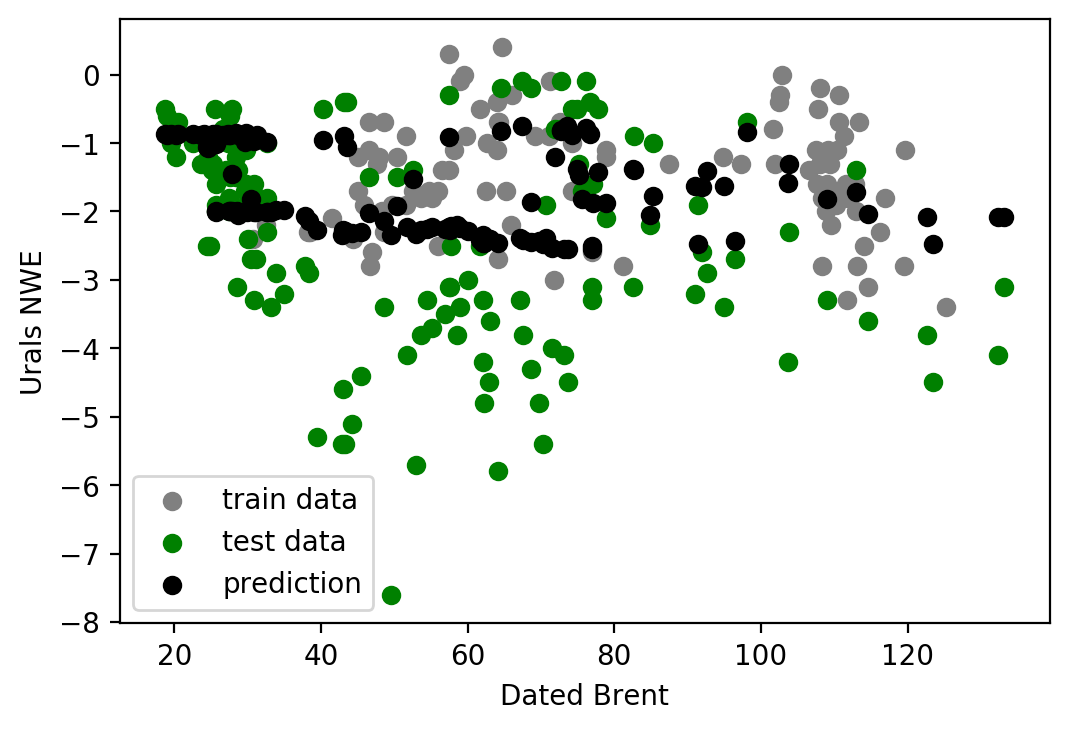

Mean squared error: 0.14
Feature ranking:
Feature Dated Brent (0.183539)
Feature FO 3.5% (0.467763)
Feature Gasoil (0.348699)


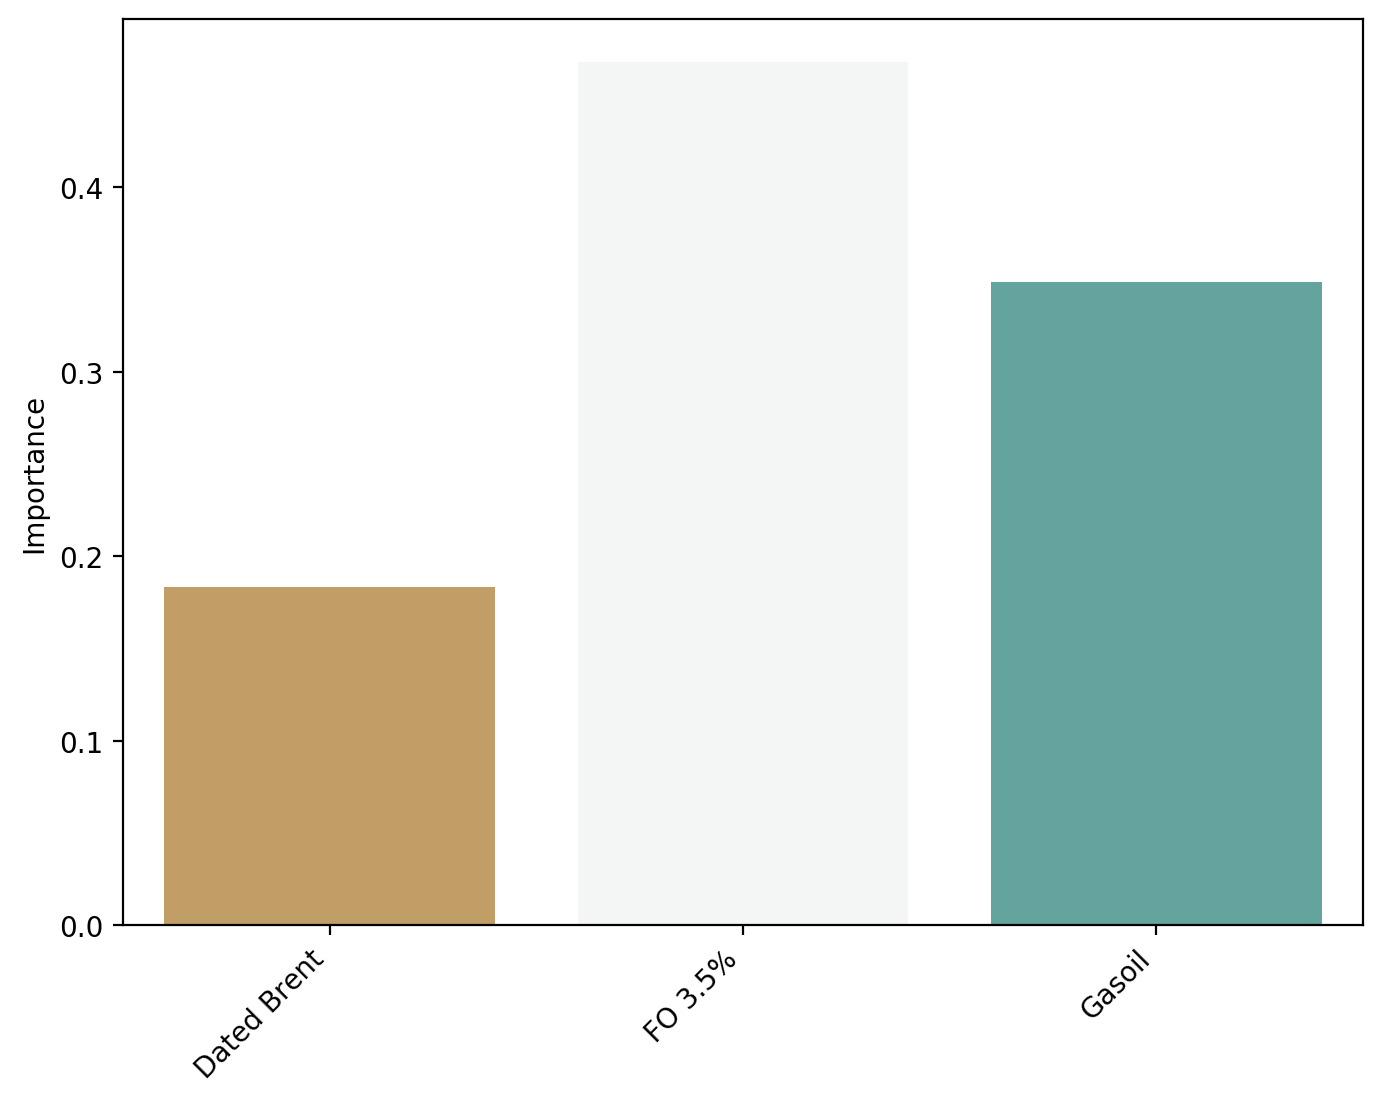

In [16]:
train_combi = combi.iloc[-100:,1:]
test_combi = combi.iloc[:-100,1:]

plt.rcParams['figure.dpi'] = 200

#x_train=train_combi.drop("Maya Europe",axis=1)
#x_train=train_combi[train_combi.columns.difference(["Mars"])]
x_train=train_combi[["Dated Brent","FO 3.5%", "Gasoil"]]
y_train=train_combi["Urals NWE"]

#df.drop('b', axis=1)

#x_test=train_combi.drop("Maya Europe",axis=1)
#x_test=test_combi[test_combi.columns.difference(["Mars"])]
x_test=test_combi[["Dated Brent","FO 3.5%", "Gasoil"]]
y_test=test_combi["Urals NWE"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["Dated Brent"],y_train,   color='grey')
plt_test=plt.scatter(x_test["Dated Brent"],y_test,   color='green')
plt_pred=plt.scatter(x_test["Dated Brent"], y_pred,  color='black')



plt.xlabel("Dated Brent")
plt.ylabel("Urals NWE")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);




In [17]:
#data_df = price[['Dated brent','FO 3.5%','FO 1%']]
data_df = pd.concat([DB, FO35,Go],axis=1)
y_pred=regressor.predict(data_df)
y_pred= pd.DataFrame(y_pred)
print(y_pred)

          0
0 -1.607421
1 -1.442980
2 -0.928441
3 -0.159112
4 -0.966113
5 -0.919996


MSE linear = 0.30
MSE non.linear = 0.51
MSE RF = 0.24
MSE MD = 2.45


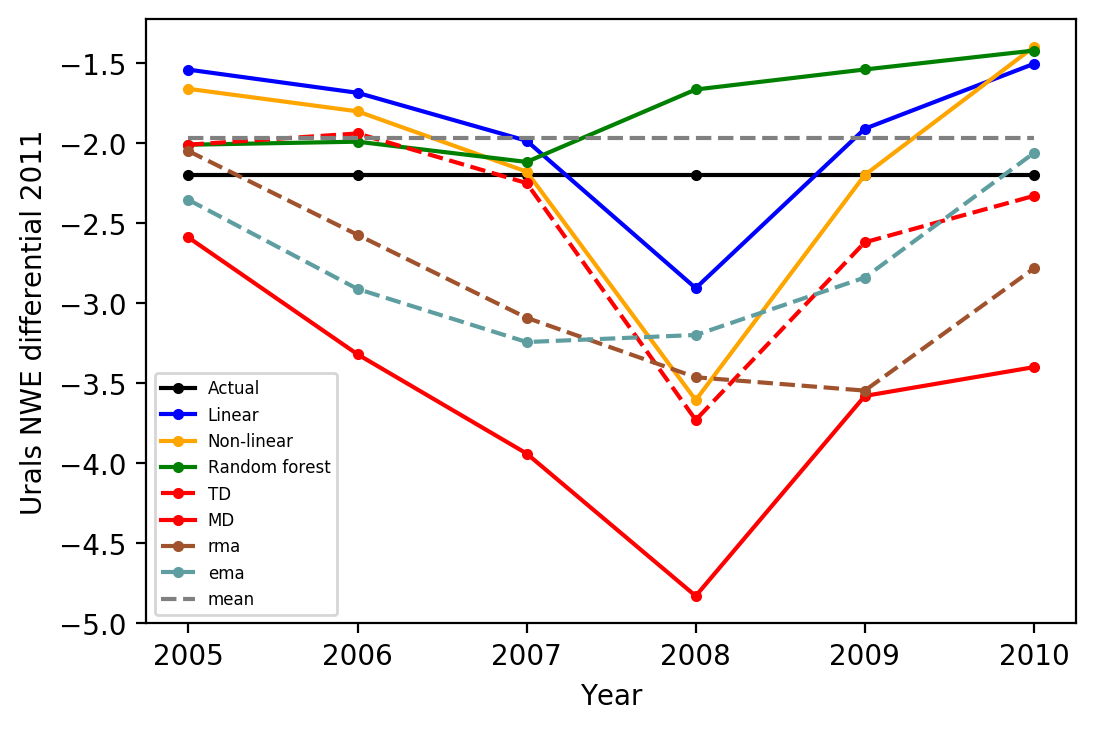

In [13]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2011"],'k.-')
plt.plot(I_2011["Pred Year"],linear_UralN,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_UralN,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2011"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2011"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-1.97,-1.97],'--',color='grey')
plt.xlabel('EPA Year')
plt.ylabel('Urals NWE differential 2011')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))

from sklearn.metrics import mean_squared_error 
mse_L = mean_squared_error(I_2011["Actual 2011"],linear_UralN)
mse_NL = mean_squared_error(I_2011["Actual 2011"],nonlinear_UralN)
mse_RF = mean_squared_error(I_2011["Actual 2011"],y_pred)
mse_MD = mean_squared_error(I_2011["Actual 2011"],I_2011["MD 2011"])


print('MSE linear =',"{0:.2f}".format(mse_L))
print('MSE non.linear =',"{0:.2f}".format(mse_NL))
print('MSE RF =',"{0:.2f}".format(mse_RF))
print('MSE MD =',"{0:.2f}".format(mse_MD))

MSE linear = 0.58
MSE non.linear = 1.12
MSE RF = 0.16
MSE MD = 5.16


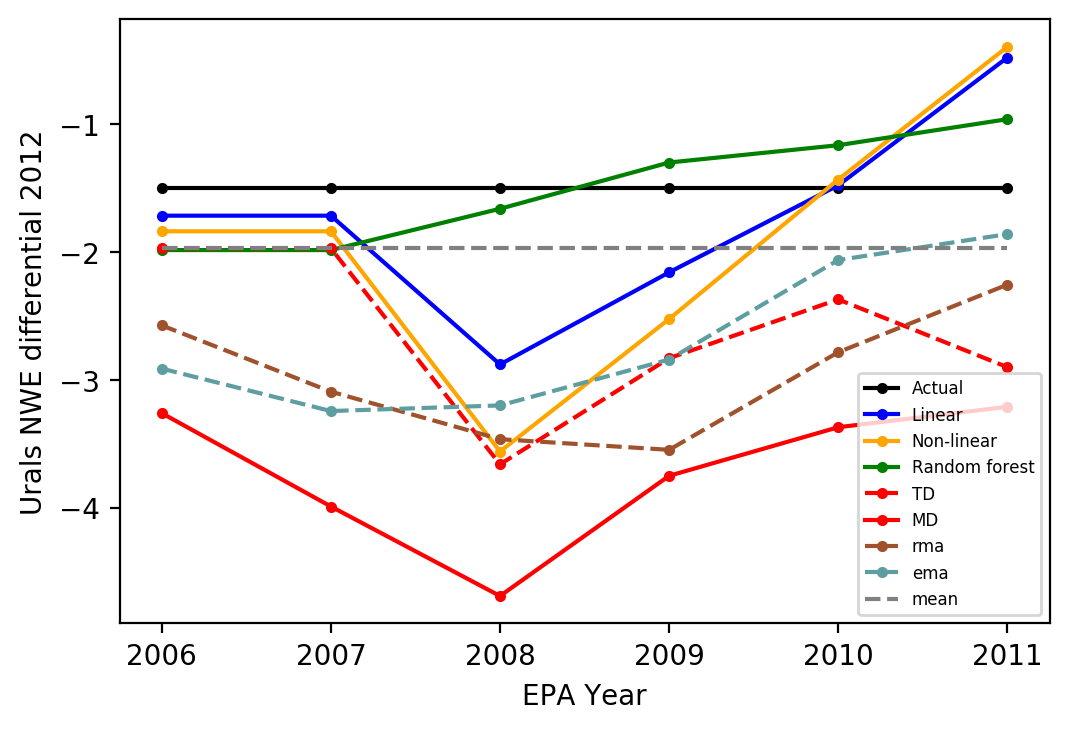

In [69]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2012"],'k.-')
plt.plot(I_2011["Pred Year"],linear_UralN,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_UralN,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2012"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2012"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-1.97,-1.97],'--',color='grey')
plt.xlabel('EPA Year')
plt.ylabel('Urals NWE differential 2012')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))

from sklearn.metrics import mean_squared_error 
mse_L = mean_squared_error(I_2011["Actual 2012"],linear_UralN)
mse_NL = mean_squared_error(I_2011["Actual 2012"],nonlinear_UralN)
mse_RF = mean_squared_error(I_2011["Actual 2012"],y_pred)
mse_MD = mean_squared_error(I_2011["Actual 2012"],I_2011["MD 2012"])


print('MSE linear =',"{0:.2f}".format(mse_L))
print('MSE non.linear =',"{0:.2f}".format(mse_NL))
print('MSE RF =',"{0:.2f}".format(mse_RF))
print('MSE MD =',"{0:.2f}".format(mse_MD))

MSE linear = 0.81
MSE non.linear = 1.51
MSE RF = 0.15
MSE MD = 5.75


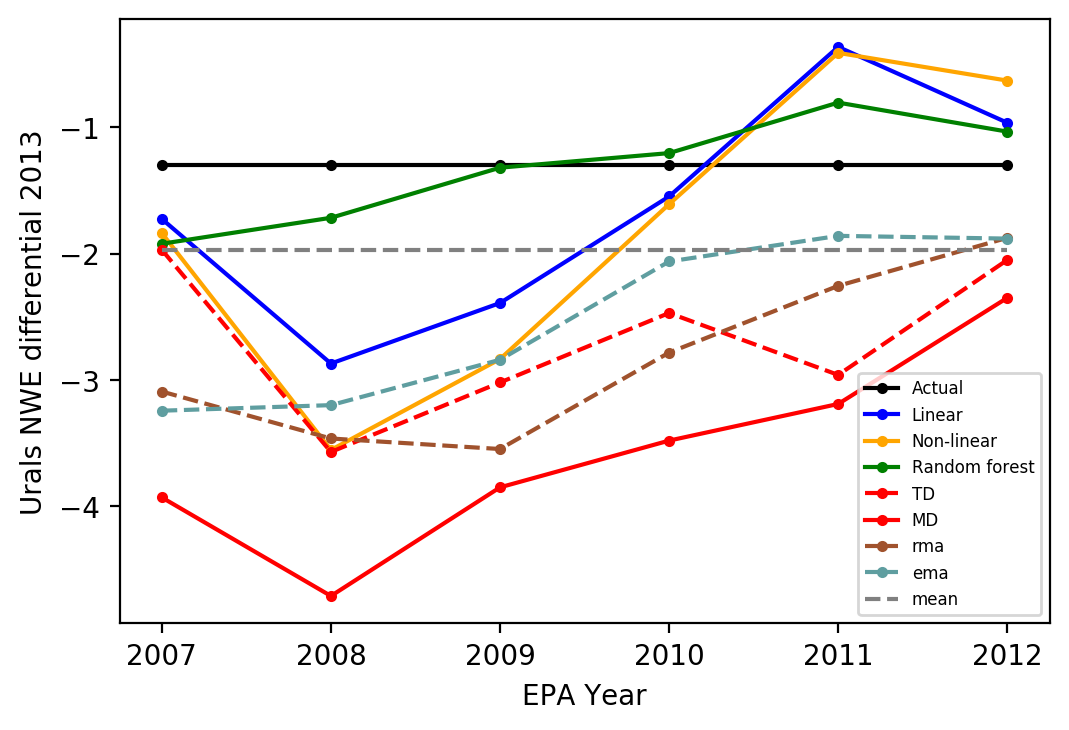

In [54]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2013"],'k.-')
plt.plot(I_2011["Pred Year"],linear_UralN,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_UralN,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2013"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2013"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-1.97,-1.97],'--',color='grey')
plt.xlabel('EPA Year')
plt.ylabel('Urals NWE differential 2013')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))

from sklearn.metrics import mean_squared_error 
mse_L = mean_squared_error(I_2011["Actual 2013"],linear_UralN)
mse_NL = mean_squared_error(I_2011["Actual 2013"],nonlinear_UralN)
mse_RF = mean_squared_error(I_2011["Actual 2013"],y_pred)
mse_MD = mean_squared_error(I_2011["Actual 2013"],I_2011["MD 2013"])


print('MSE linear =',"{0:.2f}".format(mse_L))
print('MSE non.linear =',"{0:.2f}".format(mse_NL))
print('MSE RF =',"{0:.2f}".format(mse_RF))
print('MSE MD =',"{0:.2f}".format(mse_MD))

MSE linear = 1.76
MSE non.linear = 2.08
MSE RF = 0.70
MSE MD = 3.63


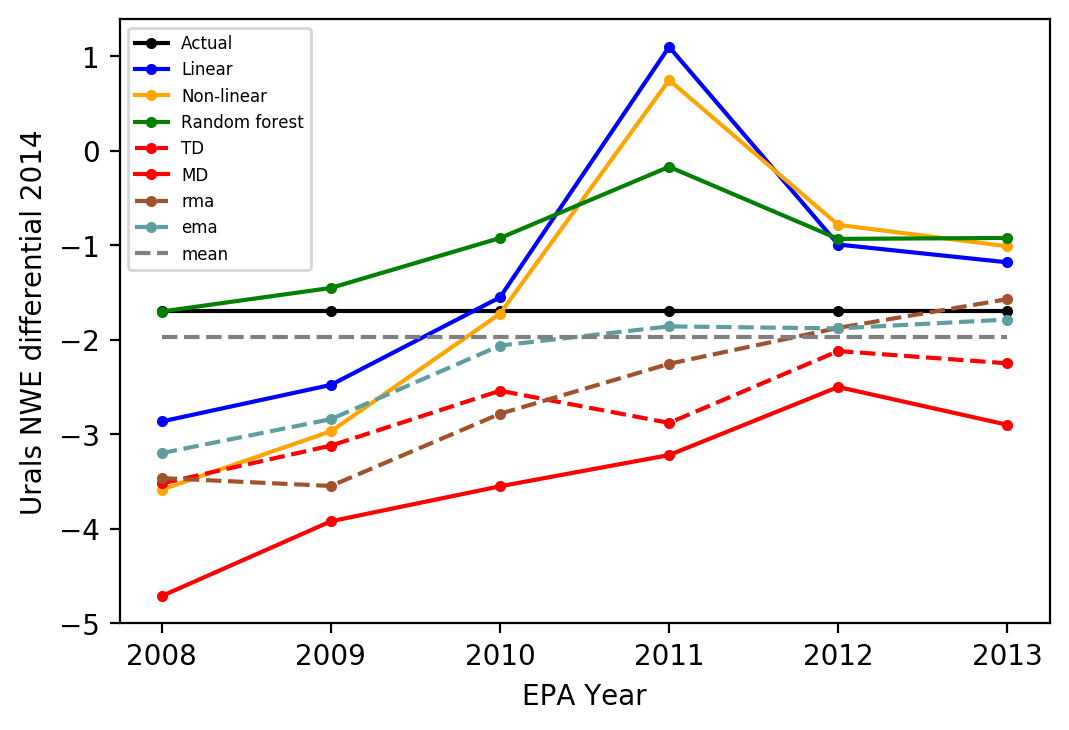

In [39]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2014"],'k.-')
plt.plot(I_2011["Pred Year"],linear_UralN,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_UralN,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2014"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2014"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-1.97,-1.97],'--',color='grey')
plt.xlabel('EPA Year')
plt.ylabel('Urals NWE differential 2014')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))

from sklearn.metrics import mean_squared_error 
mse_L = mean_squared_error(I_2011["Actual 2014"],linear_UralN)
mse_NL = mean_squared_error(I_2011["Actual 2014"],nonlinear_UralN)
mse_RF = mean_squared_error(I_2011["Actual 2014"],y_pred)
mse_MD = mean_squared_error(I_2011["Actual 2014"],I_2011["MD 2014"])


print('MSE linear =',"{0:.2f}".format(mse_L))
print('MSE non.linear =',"{0:.2f}".format(mse_NL))
print('MSE RF =',"{0:.2f}".format(mse_RF))
print('MSE MD =',"{0:.2f}".format(mse_MD))


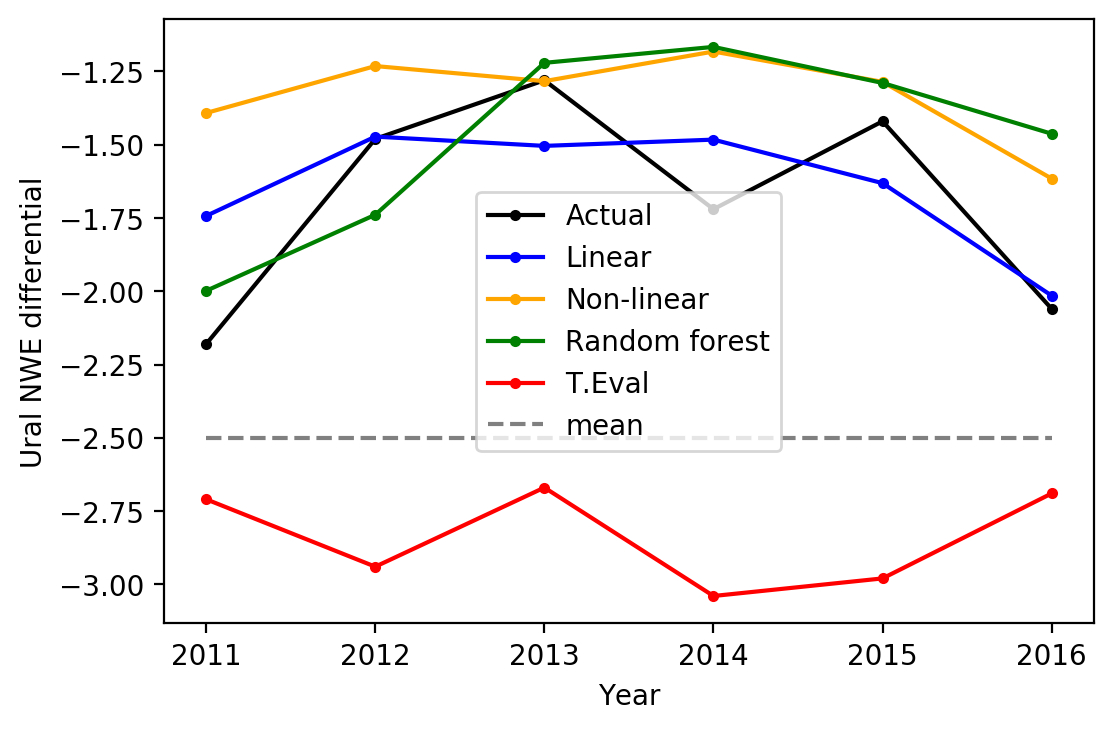

In [19]:
plt.plot(price["Year"],price["Actual UralNWE"],'k.-')
plt.plot(price["Year"],linear_UralN,'b.-')
plt.plot(price["Year"],nonlinear_UralN,'.-',color ='orange')
plt.plot(price["Year"],y_pred,'g.-')
plt.plot(price["Year"],price["TE UralNWE"],'r.-')
plt.plot([price["Year"].iloc[0],price["Year"].iloc[-1]],[-2.5,-2.5],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Ural NWE differential')
plt.legend(("Actual","Linear","Non-linear","Random forest","T.Eval","mean"))

In [16]:
price.drop(["Actual Dubai","TE Dubai","Actual WTI","TE WTI","Actual ESPO","TE ESPO","Actual MayaE","TE MayaE","Actual BL","TE BL"],axis=1)

,Year,Dated brent,Butane,VGO 0.5%,Jet Oil,Gasoil,FO 1%,FO 3.5%,pred Dubai,Actual UralNWE,TE UralNWE
0,2011,112,-29.0,3.47,16.92,13.98,-10.86,-16.83,-3.589,-2.18,-2.71
1,2012,110,-32.0,5.00,17.00,15.00,-4.00,-11.00,-2.475,-1.48,-2.94
2,2013,107,-32.4,4.90,19.70,17.10,-5.50,-12.10,-2.010,-1.28,-2.67
3,2014,108,-34.0,6.00,15.00,14.00,-9.00,-19.00,-2.910,-1.72,-3.04
4,2015,63,-29.0,1.00,19.00,16.00,-12.00,-16.00,-2.489,-1.42,-2.98
5,2016,65,-14.6,2.00,12.50,10.50,-10.50,-14.50,-2.350,-2.06,-2.69


In [12]:
Display = pd.read_table('UralNWE_2014_DISPLAY.csv',delimiter =',')
Display.drop(["TD 2014","MD Actual 2014","MD Predicted ","MD Random forest","MD Non linear","MD linear"], axis=1)

,EPA Year,Brent Predicted 2014,Brent Actual 2014
0,2008,75.0,98.9
1,2009,71.0,98.9
2,2010,82.5,98.9
3,2011,100.0,98.9
4,2012,100.0,98.9
5,2013,100.0,98.9
